In [35]:

from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random


learning_rate = 0.005
training_epochs = 1000
display_step = 50


train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]


X = tf.placeholder("float")
Y = tf.placeholder("float")


W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


pred = tf.add(tf.multiply(X, W), b)


cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)


Epoch: 0050 cost= 0.101886630 W= 0.33963 b= 0.164253
Epoch: 0100 cost= 0.100407772 W= 0.336954 b= 0.183359
Epoch: 0150 cost= 0.099016458 W= 0.33436 b= 0.201891
Epoch: 0200 cost= 0.097707592 W= 0.331843 b= 0.219866
Epoch: 0250 cost= 0.096476257 W= 0.329402 b= 0.237301
Epoch: 0300 cost= 0.095317870 W= 0.327035 b= 0.254212
Epoch: 0350 cost= 0.094228134 W= 0.324738 b= 0.270615
Epoch: 0400 cost= 0.093202911 W= 0.322511 b= 0.286526
Epoch: 0450 cost= 0.092238493 W= 0.32035 b= 0.301958
Epoch: 0500 cost= 0.091331176 W= 0.318255 b= 0.316927
Epoch: 0550 cost= 0.090477675 W= 0.316222 b= 0.331445
Epoch: 0600 cost= 0.089674696 W= 0.31425 b= 0.345528
Epoch: 0650 cost= 0.088919342 W= 0.312338 b= 0.359188
Epoch: 0700 cost= 0.088208735 W= 0.310483 b= 0.372437
Epoch: 0750 cost= 0.087540232 W= 0.308684 b= 0.385289
Epoch: 0800 cost= 0.086911395 W= 0.306939 b= 0.397753
Epoch: 0850 cost= 0.086319782 W= 0.305246 b= 0.409844
Epoch: 0900 cost= 0.085763276 W= 0.303604 b= 0.421571
Epoch: 0950 cost= 0.085239716 W=

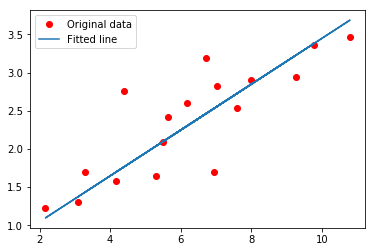

Testing... (Mean square loss Comparison)
Testing cost= 0.077357
Absolute mean square loss difference: 0.00739019


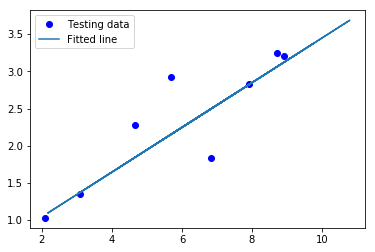

In [36]:

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


init = tf.global_variables_initializer()


with tf.Session() as sess:

   
    sess.run(init)

    
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

   
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
plt.show()